#Instructions
* **<font color="red">When you load this page, go to "Cell->Run All" to start the program running.  After that point, you should be able to use the sliders and buttons to manipulate the output.</font>**  
* If things go totally awry, you can go to "Kernel->Restart" and then "Cell->Run All".  A more drastic solution would be to close and reload the page, which will reset the code to its initial state.  
* If you're interested in programming, click the "Toggle raw code" button.  This will expose the underlying program, written in the Python3 programming language.  You can edit the code to your heart's content: just go to "Cell->Run All" after you modify things so the changes will be incorporated.  Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code

In [1]:
# -----------------------------------------------------------------------------------
# Javascript that gives us a cool hide-the-code button 

from IPython.display import HTML

HTML('''

<script>
    code_show=true; 
    
    function code_toggle() {
     if (code_show){
         $('div.input').hide();
     } else {
         $('div.input').show();
     }
     code_show = !code_show
    } 
    
    $( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle raw code">
</form>

''')

# ------------------------------------------------------------------------------------

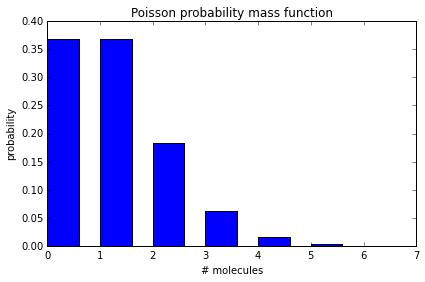

    counts      prob
         0     0.368
         1     0.368
         2     0.184
         3     0.061
         4     0.015
         5     0.003
         6     0.001


In [2]:

#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import poisson

# libraries for making pretty sliders and interactive graphs
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

def calc_poisson(mu):
    """
    Calculate a poisson distribution pmf given a value for mu, spitting a graph and a pretty
    table.
    """

    # some constants for making pretty graph/table
    max_count = 200
    p_cutoff = 0.0001
    
    # Do pmf calculation
    x = np.arange(max_count)
    p = poisson.pmf(np.arange(max_count),mu)
    
    # only grab data with reasonable probability
    truth_table = p > p_cutoff
    x = x[truth_table]
    p = p[truth_table]
    
    # Make graph
    plt.bar(x,p,width=0.6)
    plt.xlabel("# molecules")
    plt.ylabel("probability")
    plt.title("Poisson probability mass function")
    plt.tight_layout()
    plt.show()

    # write data table
    print("{:>10s}{:>10s}".format("counts","prob"))
    for i in range(len(x)):
        print("{:10d}{:10.3f}".format(x[i],p[i]))


# graph/slider widget
mu_widget = widgets.IntSlider(description="expected number of molecules",min=1,max=100,step=1,value=10)
container = widgets.interactive(calc_poisson,mu=mu_widget)
display(container)
